# Census Income

Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights.

There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv


In [54]:
# This a Classification problem.

In [55]:
path_name = "/Users/geetanjalijoshi/Desktop/DATASCIENCE/datasets /Census Income.csv"

In [56]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [140]:
# import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.compose import ColumnTransformer

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import warnings 
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv(path_name)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [93]:
# making a copy of original data for further analysis
df1 = df.copy()

In [94]:
# Remove whitespace from all string columns
# df.replace(r'\s*\?\s*', np.nan, regex=True, inplace=True)
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df1.replace("?",np.nan, inplace = True)

In [95]:
# df1.replace(" ?",np.nan, inplace = True)
# df1.replace("? ",np.nan, inplace = True)
# df1.replace("?",np.nan, inplace = True)

In [96]:
# Check for remaining '?' values
for column in df1.columns:
    value_counts = df1[column].value_counts(dropna=False)
    print(f"\nValue count for: {column}")
    print(value_counts)
    print("-" * 50)


Value count for: Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
--------------------------------------------------

Value count for: Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------------------

Value count for: Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
--------------------------------------------------

Value count for: Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
df1.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

# Duplicate values 

In [99]:
df1.drop_duplicates(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


# Checking for null values 

In [100]:
df1.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

# Imputing null values 

imputing null values for each column having null values
for column in df1.columns:
    if df1[column].dtype == 'O': # checking for datatype as object
        df1[column].fillna(df1[column].mode()[0], inplace = True)
    else:   # datatype other than object
        df1[column].fillna(df1[column].mean(),inplace = True)

In [101]:
# let us remove the null values 
df1.dropna(axis=0, inplace = True)

In [102]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [103]:
print(df.shape)
print(df1.shape)

(32560, 15)
(30138, 15)


# Checking for irrelevant columns in the dataset 

In [104]:
# Dropping columns Education and Fnlwgt
df1.drop(['Fnlwgt','Education'],axis = 1, inplace = True)
df1.head(2)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Correlation between numeric columns

<Axes: >

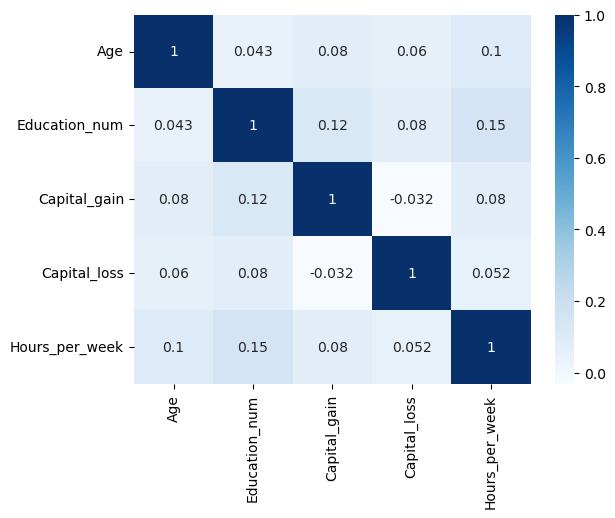

In [105]:
# for numerical columns 

corr = df1.corr(numeric_only = True)

# plot heatmap 

sns.heatmap(corr,annot = True, cmap ='Blues' )

- above correlation matrix shows us that there is very weak relationship between the numerical columns

# Feature Engineering

In [106]:
# creating a new feature 'Net_capital' by combining 'Capital_gain' and 'Capital_loss'

df1['Net_capital'] = df1['Capital_gain'] - df1['Capital_loss']

# drop original 'Capital_gain' and 'Capital_loss'

df1.drop(['Capital_gain','Capital_loss'], axis = 1, inplace = True)
df1.head(2)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Net_capital
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0


In [107]:
# creating a new feature 'Age_group' for 'Age' column
def age_group(age):
    if age < 18:
        return 'Young'
    elif 18 <= age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df1['Age_group'] = df1['Age'].apply(age_group)
df1[['Age','Age_group']].head(2)

,Age,Age_group
0,50,Adult
1,38,Adult


In [108]:
df1['Age_group'].value_counts()

Adult     28005
Senior     1805
Young       328
Name: Age_group, dtype: int64

In [109]:
df1.drop(['Age'],axis=1,inplace= True)

In [110]:
df1.head(2)

,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Net_capital,Age_group
0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,Adult
1,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,Adult


# Seperate categorical and numerical columns from the dataset

In [111]:
# numerical columns
num_col = df1.select_dtypes(include=['int64', 'float64'])
num_col.columns

Index(['Education_num', 'Hours_per_week', 'Net_capital'], dtype='object')

In [112]:
# categorical columns 
cat_col = df1.select_dtypes(include=['O'])
cat_col.columns

Index(['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native_country', 'Income', 'Age_group'],
      dtype='object')

In [113]:
# discrete features

In [114]:
# continuous features

# Visualization for numerical columns


-> Distribution of Numerical columns

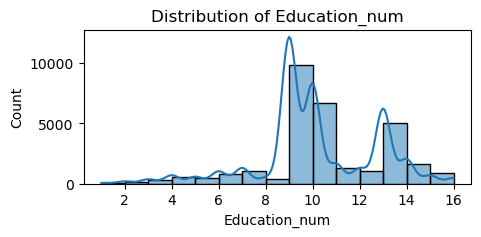

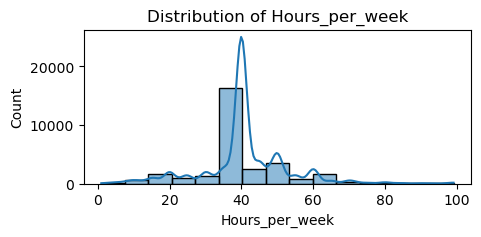

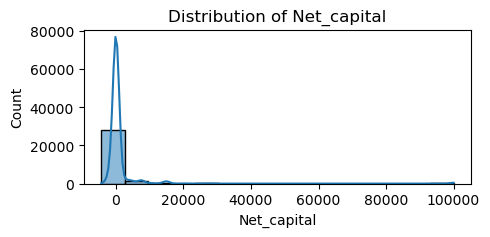

In [115]:
for column in num_col:
    plt.figure(figsize=(5, 2))
    sns.histplot(df1[column],bins=15 ,kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualization of Categorical columns 

-> Distribution of Categorical columns

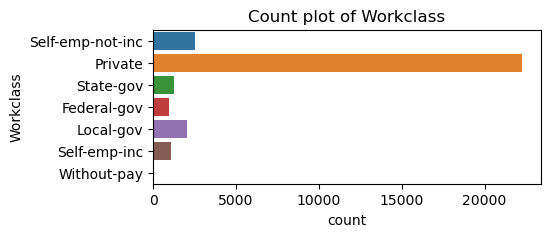

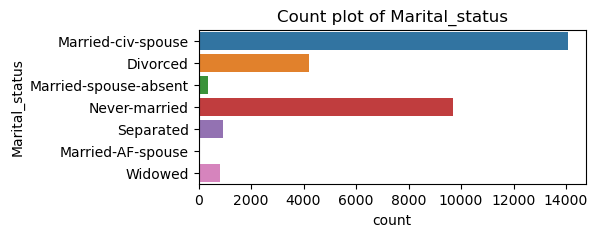

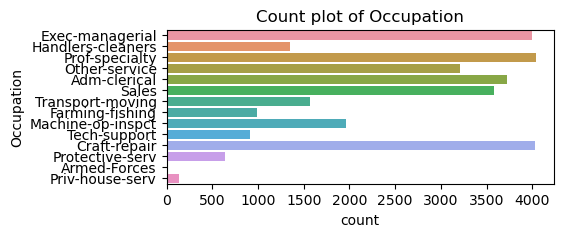

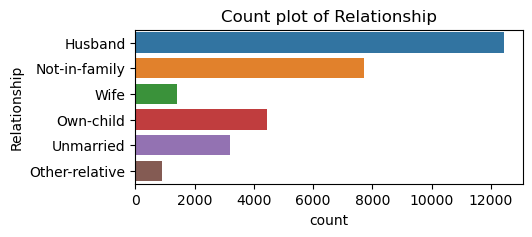

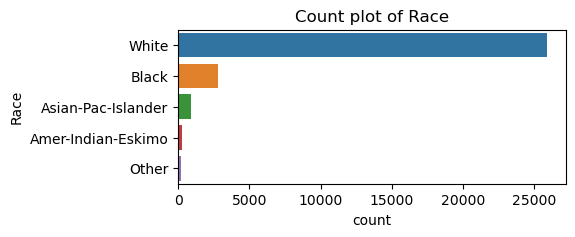

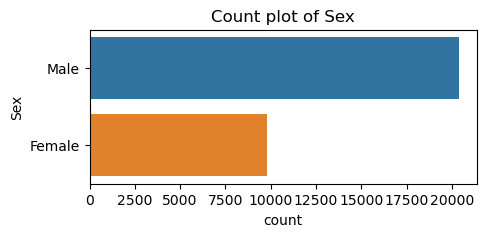

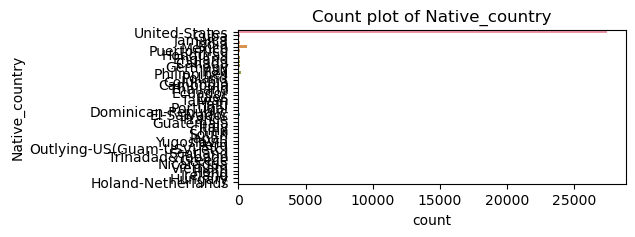

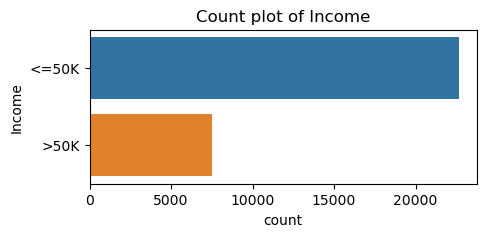

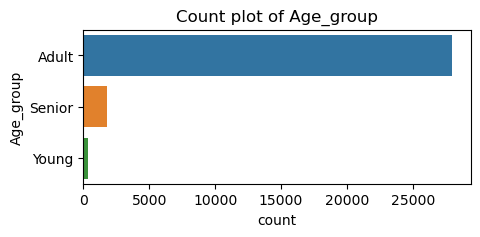

In [116]:
for column in cat_col:
    plt.figure(figsize=(5,2))
    sns.countplot(y=df1[column])
    plt.title(f'Count plot of {column}')
    plt.show()

In [117]:
df.describe(include= 'O')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


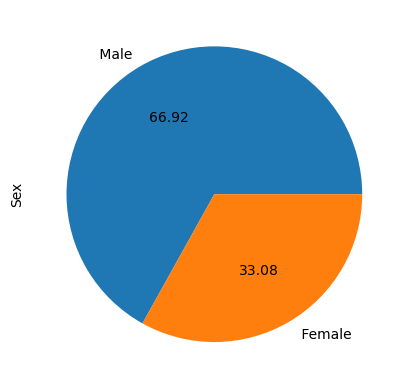

In [118]:

df['Sex'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [119]:
# Bivariate analysis

# check any outliers 

In [120]:
df1.describe()

,Education_num,Hours_per_week,Net_capital
count,30138.000000,30138.000000,30138.000000
mean,10.122437,40.934734,1004.362466
std,2.548727,11.978951,7433.275977
min,1.000000,1.000000,-4356.000000
25%,9.000000,40.000000,0.000000
50%,10.000000,40.000000,0.000000
75%,13.000000,45.000000,0.000000
max,16.000000,99.000000,99999.000000


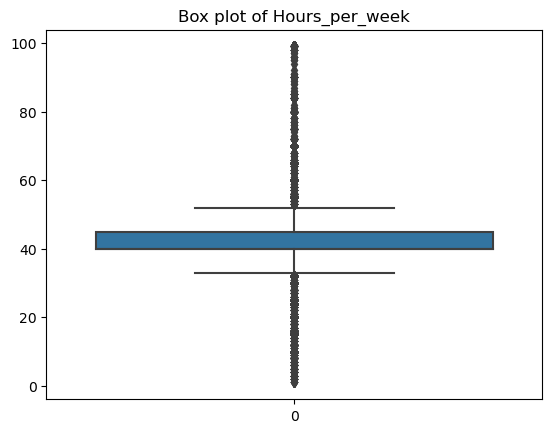

In [121]:
# Boxplot for Hours_per_week column

sns.boxplot(df1['Hours_per_week'])
plt.title('Box plot of Hours_per_week')
plt.show()


- we can observe from the boxplot that there are some extreme values in the range of 60 to 80

In [122]:
# finding outliers through IQR method
Q1 = df1['Hours_per_week'].quantile(0.25)
Q3 = df1['Hours_per_week'].quantile(0.75)
IQR = Q3-Q1
print('IQR:', IQR)

IQR: 5.0


In [123]:
upper_limit = Q3 + (1.5*IQR)
print('upper_limit :', upper_limit)

upper_limit : 52.5


In [124]:
lower_limit = Q3 - (1.5*IQR)
print('lower_limit :', lower_limit)

lower_limit : 37.5


- values above upper_limit : 52.5 will be outliers
- values below lower_limit : 37.5 

In [126]:
# Handling outliers 
upper = np.where(df1['Hours_per_week'] >= upper_limit)
upper # shows the row numbers where outliers are present
df1['Hours_per_week'] = df1['Hours_per_week'].drop(upper[0],inplace = True)
df1.shape

KeyError: '[92, 220, 244, 396, 429, 514, 538, 589, 647, 711, 728, 805, 889, 1099, 1223, 1324, 1346, 1432, 1543, 1675, 2071, 2098, 2104, 2117, 2322, 2358, 2463, 2520, 2569, 2856, 2908, 2925, 2929, 2931, 2951, 3022, 3268, 3350, 3452, 3485, 3635, 3901, 3948, 4071, 4085, 4108, 4154, 4325, 4336, 4368, 4395, 4434, 4577, 4720, 5080, 5208, 5439, 5528, 5622, 5631, 5646, 5678, 6058, 6175, 6241, 6283, 6284, 6833, 7010, 7071, 7074, 7079, 7252, 7300, 7436, 7559, 7633, 7739, 7901, 7970, 8041, 8321, 8446, 8787, 8852, 8948, 9196, 9483, 9548, 9707, 9777, 9926, 10459, 10573, 10646, 10672, 10699, 10930, 10954, 11260, 11285, 11420, 11445, 11543, 11690, 12028, 12067, 12542, 12689, 12958, 13068, 13301, 13492, 13503, 13568, 13767, 13814, 13896, 13912, 14254, 14343, 14409, 14498, 14533, 14540, 14570, 14687, 15129, 15218, 15309, 15349, 15541, 15671, 15845, 15987, 16135, 16172, 16230, 16455, 17014, 17451, 18007, 18018, 18200, 18276, 18293, 18908, 18981, 18988, 19036, 19045, 19167, 19239, 19283, 19319, 19344, 19708, 19763, 19767, 19785, 19819, 19985, 20022, 20202, 20332, 20529, 20550, 20657, 20663, 21107, 21194, 21271, 21482, 21486, 21536, 21647, 21665, 21860, 21945, 22067, 22164, 22253, 22263, 22299, 22347, 22428, 22539, 22555, 22741, 22770, 22789, 22860, 23008, 23191, 23236, 23283, 23350, 23387, 23743, 23821, 23891, 24014, 24046, 24154, 24875, 25043, 25052, 25185, 25295, 25684, 25771, 25805, 26295, 26488, 26512, 26680, 26981, 27050, 27139, 27266, 27304, 27316, 27349, 27675, 28043, 28229, 28302, 28504, 28685, 28772, 28801, 28810, 28890, 29071, 29296, 29309, 29323, 29324, 29390, 29435, 29585, 29661, 29692, 30060] not found in axis'

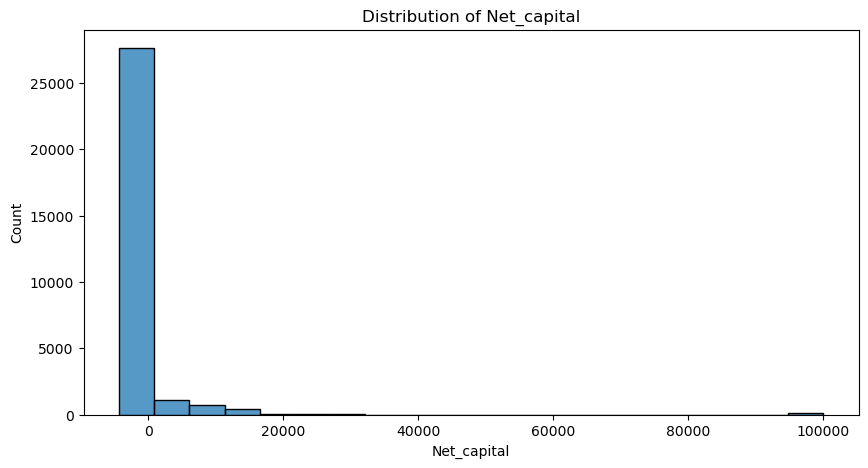

In [127]:
# Histogram plot for Net capital
plt.figure(figsize=(10, 5))
sns.histplot(df1['Net_capital'],bins=20)
plt.title('Distribution of Net_capital')
plt.show()

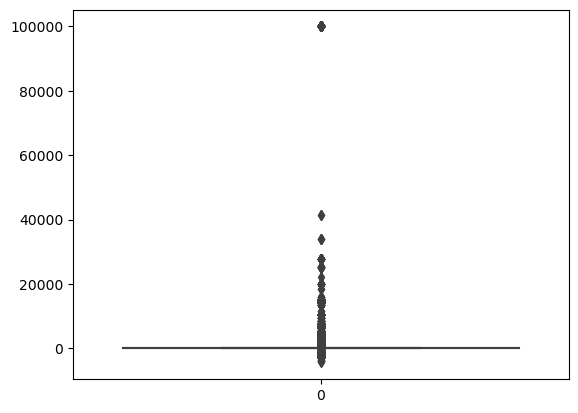

In [128]:
# Boxplot for Netcapital
sns.boxplot(df1['Net_capital'])
plt.show()

- The high standard deviation (7409.10) and the large range indicate the presence of extreme values which can be considered outliers.

- Values significantly different from the mean, especially the extreme values near the minimum and maximum, may be considered outliers.

In [129]:
# Handling outliers using IQR method

Q1 = df1['Net_capital'].quantile(0.25)
Q3 = df1['Net_capital'].quantile(0.75)
IQR = Q3-Q1
print("IQR : ", IQR)

IQR :  0.0


In [50]:
- IQR = 0 which means 

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3264507798.py, line 1)

In [130]:
upper_limit = Q3
upper_limit

0.0

In [131]:
lower_limit = Q1
lower_limit 

0.0

In [132]:
# Handling outliers 
upper = np.where(df1['Net_capital'] >= upper_limit)
upper # shows the row numbers where outliers are present


(array([    0,     1,     2, ..., 30135, 30136, 30137]),)

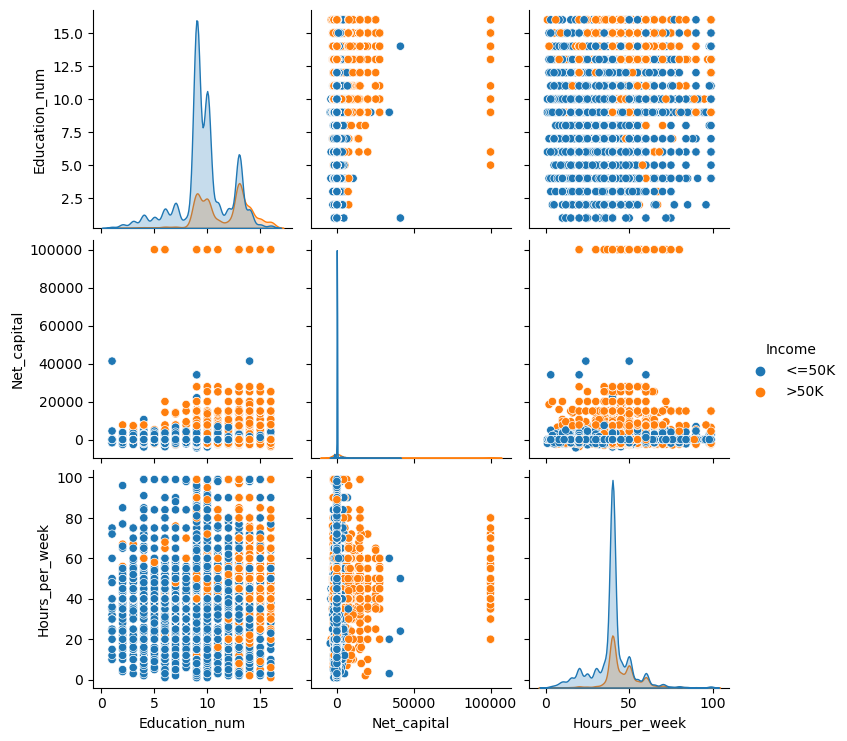

In [133]:
# Pair plot for numerical features and Income
sns.pairplot(df1, hue='Income', vars=['Education_num', 'Net_capital', 'Hours_per_week'])
plt.show()

In [134]:
# Check for remaining '?' values
for column in df1.columns:
    value_counts = df1[column].value_counts(dropna=False)
    print(f"\nValue count for: {column}")
    print(value_counts)
    print("-" * 50)


Value count for: Workclass
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1278
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64
--------------------------------------------------

Value count for: Education_num
9     9834
10    6669
13    5041
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: Education_num, dtype: int64
--------------------------------------------------

Value count for: Marital_status
Married-civ-spouse       14059
Never-married             9710
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_status, dtype: int64
--------------------------------------------------

Value count for: Occupation
Prof-specialty       4034
Craft-repair         4025

# Train Test Split and Model Training

In [158]:
X = df1.drop(['Income'],axis=1)
y = df1['Income']

In [159]:
y.value_counts()

<=50K    22632
>50K      7506
Name: Income, dtype: int64

In [160]:
X.head()

,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Net_capital,Age_group
0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,Adult
1,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,Adult
2,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,Adult
3,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,Adult
4,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0,Adult


In [161]:
# seperate data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
X_train.shape,X_test.shape

((24110, 11), (6028, 11))

# Model Selection

# Logistic Regression

In [68]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

# Random Forest Model 

In [70]:
rfc = RandomForestClassifier(random_state=42)

In [71]:
params = {
    'n_estimators': (10, 100),          # Number of trees in the forest
    'max_depth': (1, 20),               # Maximum depth of the tree
    'min_samples_split': (2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]          # Whether bootstrap samples are used when building trees
}

In [72]:
bayes_optimiser = BayesSearchCV(estimator=rfc, search_spaces=params, n_iter=32, cv=3, random_state=42, n_jobs=-1)

In [73]:
bayes_optimiser.fit(X_train, y_train)

BayesSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, n_jobs=-1, random_state=42,
              search_spaces={'bootstrap': [True, False], 'max_depth': (1, 20),
                             'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 100)})

In [78]:
# Print the best parameters found
bayes_optimiser.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 18),
             ('min_samples_leaf', 1),
             ('min_samples_split', 20),
             ('n_estimators', 100)])

In [80]:
# Evaluate the best model on the test set
best_model = bayes_optimiser.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test set accuracy: {test_score}")

Test set accuracy: 0.8553439803439803
